In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sweetviz as sv
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
twitch_df_X = pd.read_pickle('twitch_df_wrng.pkl')

In [4]:
twitch_df_X.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1


In [5]:
twitch_df_X = twitch_df_X[twitch_df_X['Date'] != '2023-03-01']

In [6]:
twitch_df_X[(twitch_df_X['Year'] == 2023)].tail(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
895,Undisputed,2,2023,1066525,24598,69575,173,5066,1532.0,35.0,0.02,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
896,Wild Hearts,2,2023,4637613,132860,76574,845,15433,6663.0,191.0,0.03,2023-02-01,2023-03-01,2023-05-01,2023-08-01,702432,0,0,0,1


In [7]:
twitch_df_X[twitch_df_X['Hours_watched_1mth'] == 0].count()

Game                  1193
Month                 1193
Year                  1193
Hours_watched         1193
Hours_streamed        1193
Peak_viewers          1193
Peak_channels         1193
Streamers             1193
Avg_viewers           1193
Avg_channels          1193
Avg_channel_ratio     1193
Date                  1193
one_month_future      1193
three_month_future    1193
six_month_future      1193
Hours_watched_1mth    1193
Hours_watched_3mth    1193
Hours_watched_6mth    1193
Jan_Debut_Month       1193
Next_mth_200          1193
dtype: int64

In [8]:
'''Baseline model would predict that ~60% of games will not be in the top 200 after 1. 
809 games were still in the top 200 after 1 month. Here I am setting up baseline for comparison later. Notebook is easier
to read when the analysis of this baseline prediction and model prediction are by each other'''

'Baseline model would predict that ~60% of games will not be in the top 200 after 1. \n809 games were still in the top 200 after 1 month. Here I am setting up baseline for comparison later. Notebook is easier\nto read when the analysis of this baseline prediction and model prediction are by each other'

In [9]:
baseline_df = twitch_df_X.sort_values(by = 'Hours_watched', ascending = False)

In [10]:
baseline_df.reset_index(drop = True, inplace = True)

In [11]:
base_pred = [1]*809 + [0]*1193

In [12]:
baseline_df['prediction'] = base_pred

In [13]:
baseline_df.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,prediction
0,League of Legends,1,2016,94377226,1362044,530270,2903,129172,126851.0,1831.0,...,2016-01-01,2016-02-01,2016-04-01,2016-07-01,93154772,88389049,77871713,1,1,1
1,Escape from Tarkov,1,2022,93334264,1343113,690725,3186,71932,125449.0,1805.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,24312041,14338993,38628111,1,1,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    twitch_df_X.Next_mth_200, test_size=0.25, stratify = twitch_df_X.Next_mth_200,
                                                    random_state=1701)

In [15]:
c_report = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])

                                             |          | [  0%]   00:00 -> (? left)

In [16]:
'Test and training data do not appear to be different by any obvious criteria'

'Test and training data do not appear to be different by any obvious criteria'


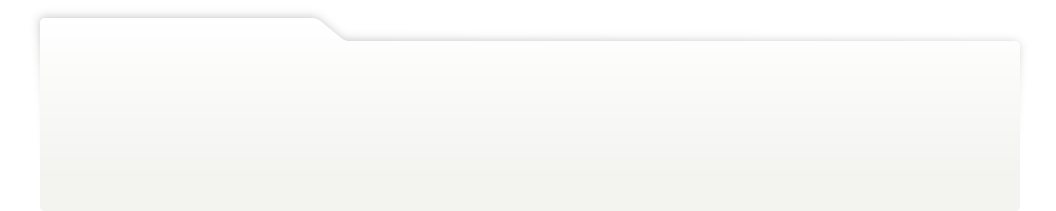
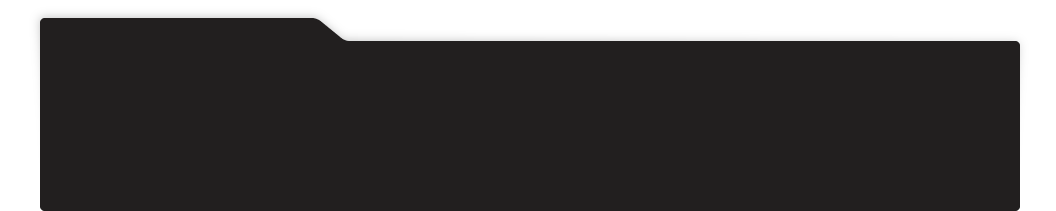
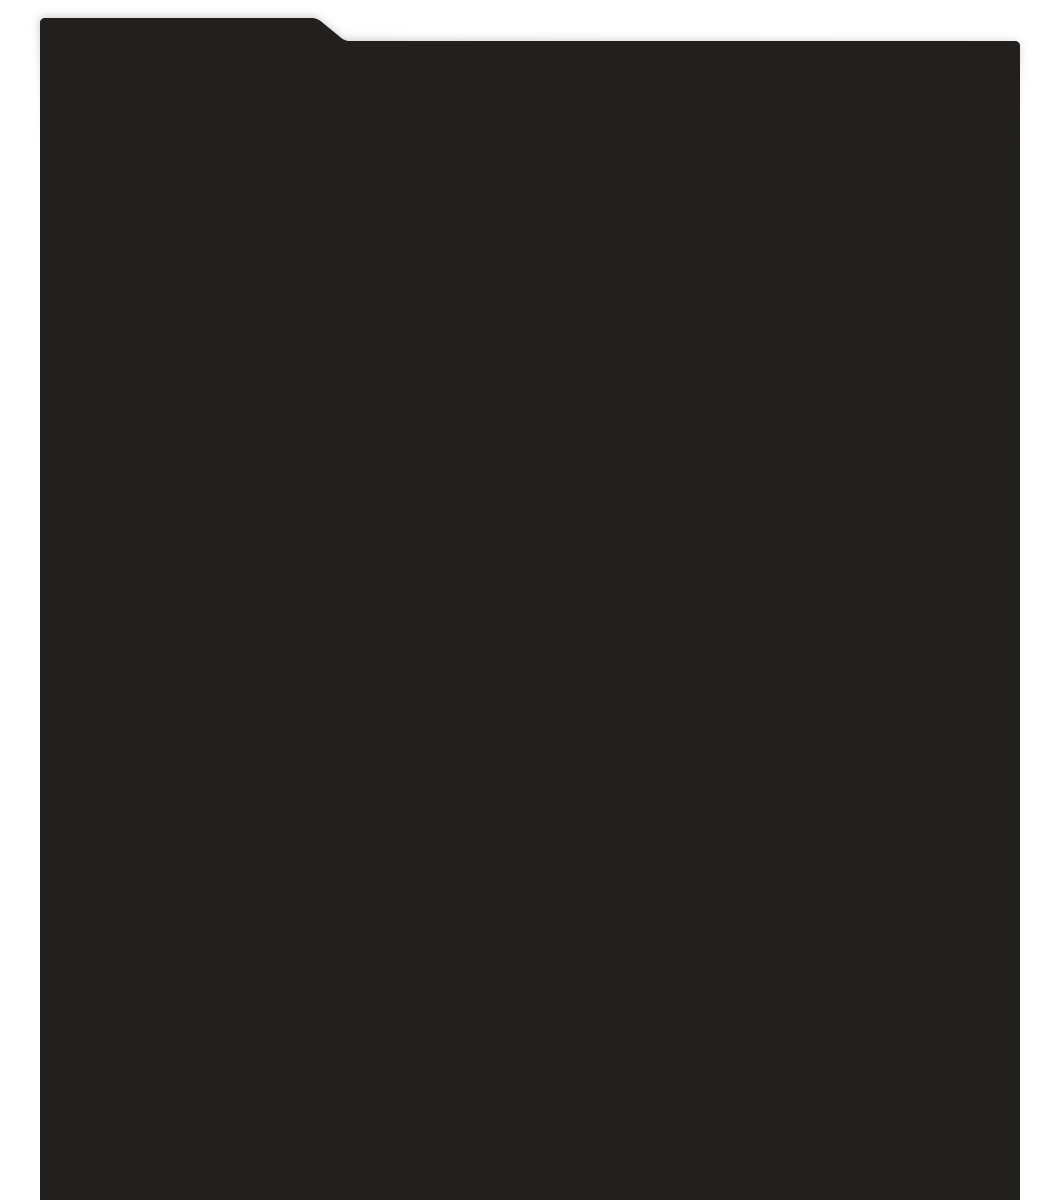
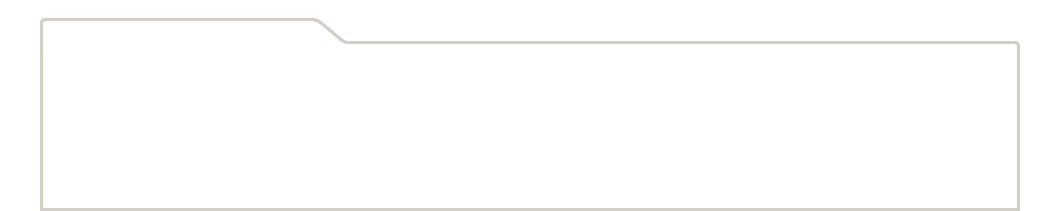
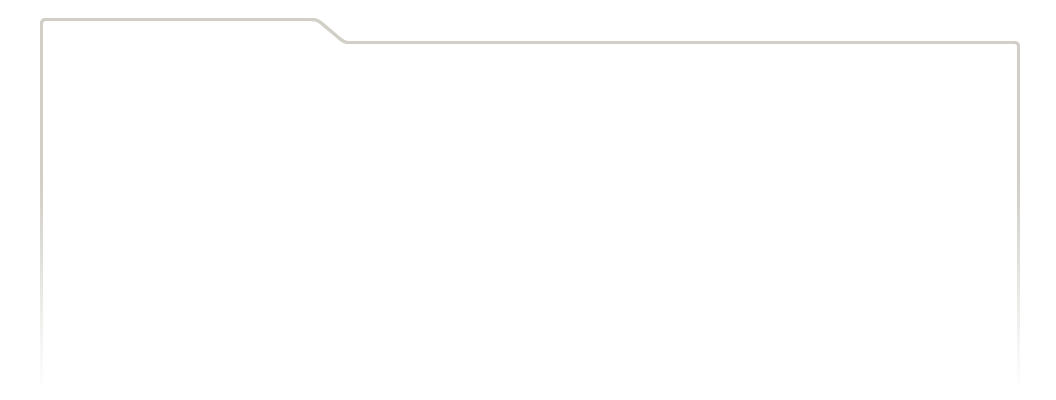
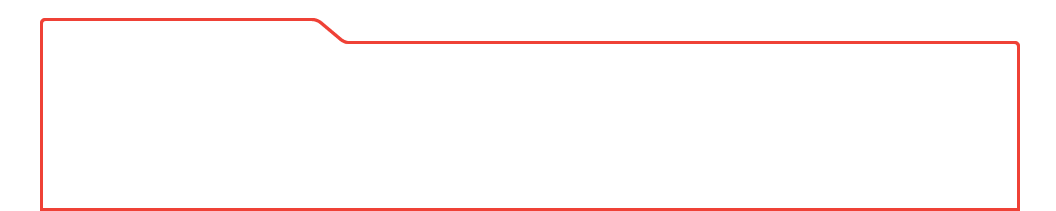
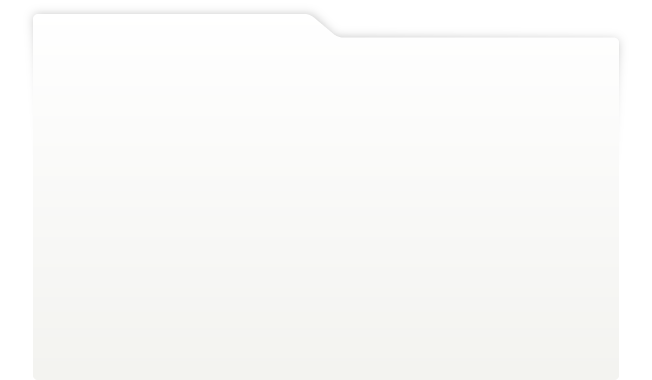
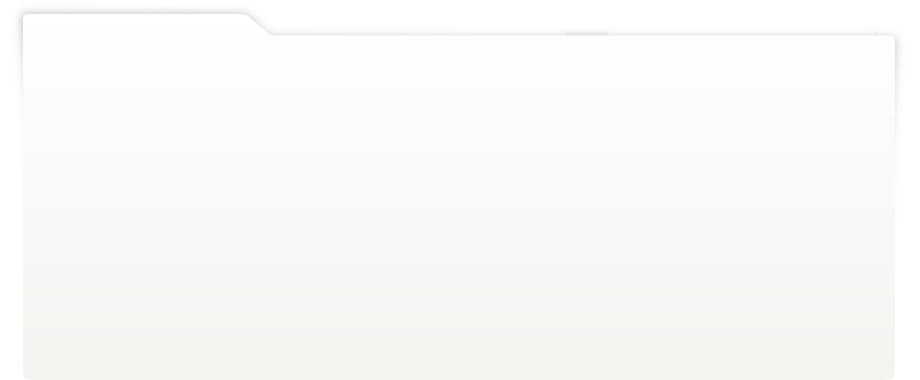
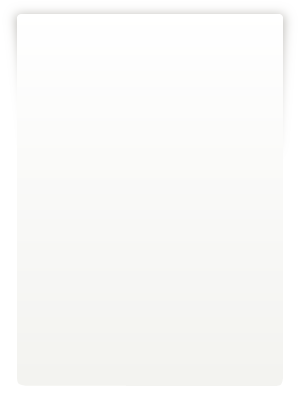
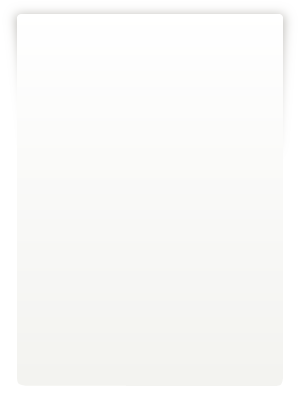
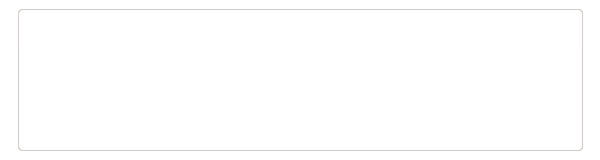
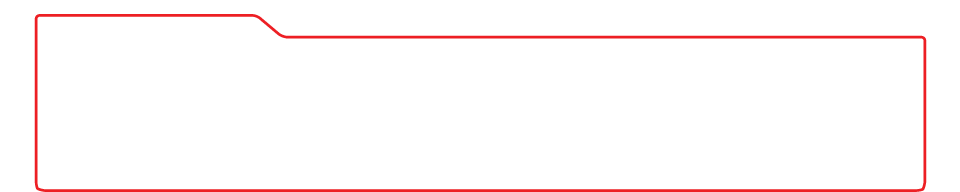
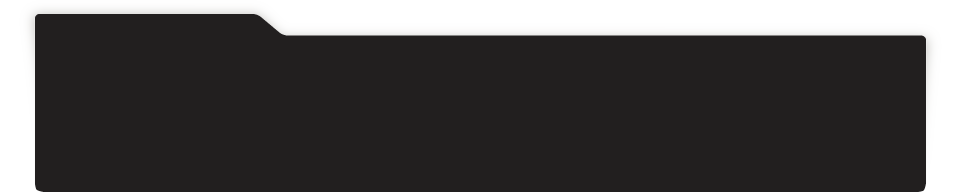
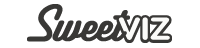
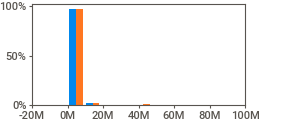
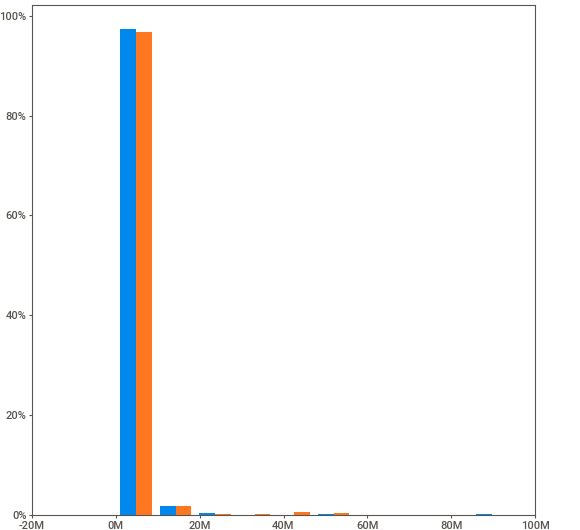
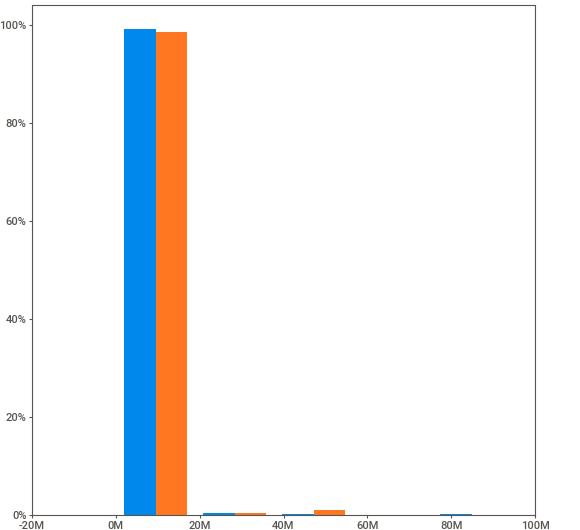
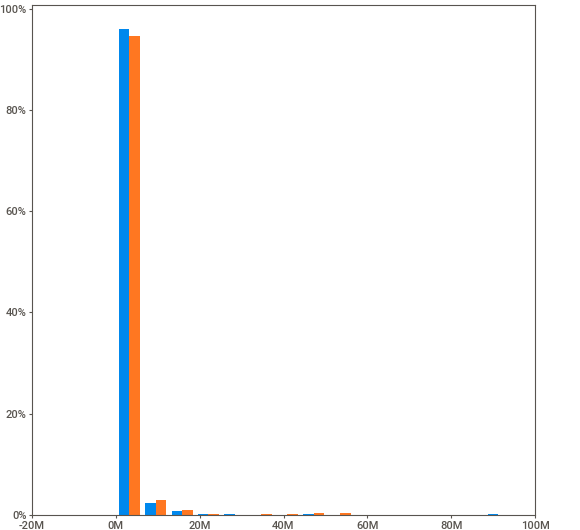
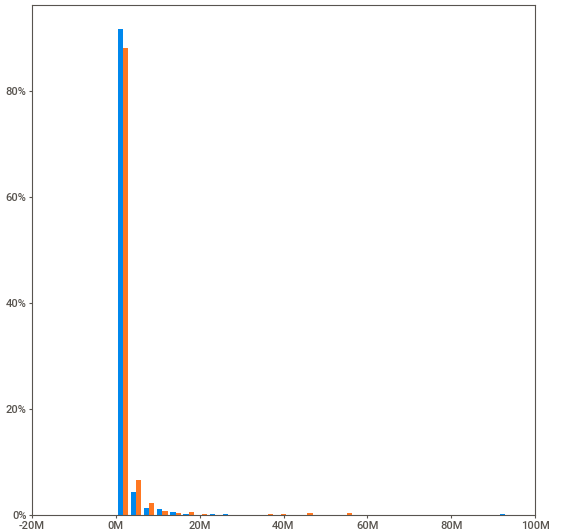
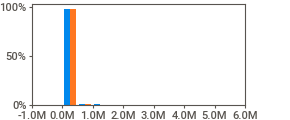
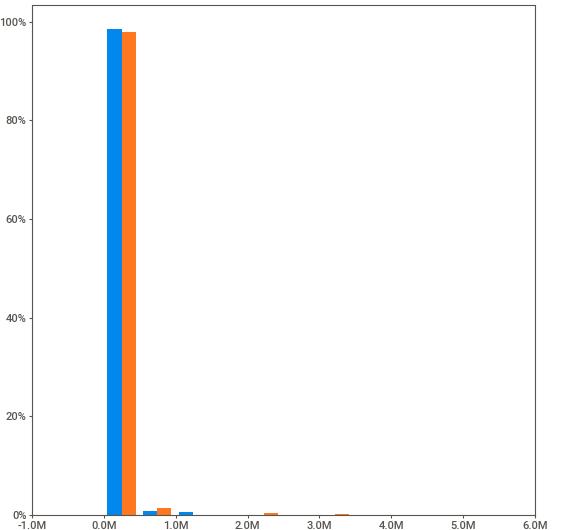
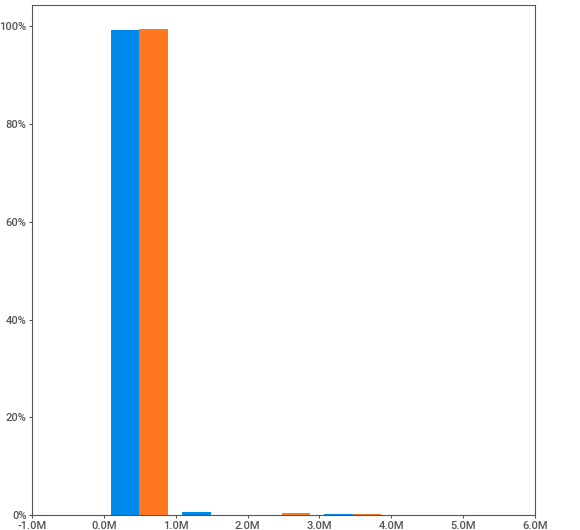
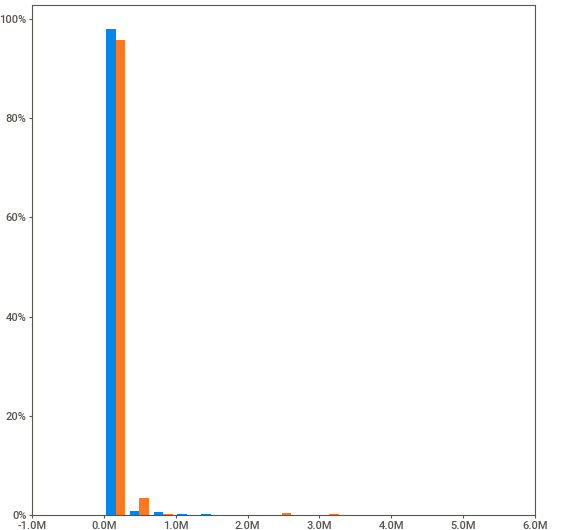
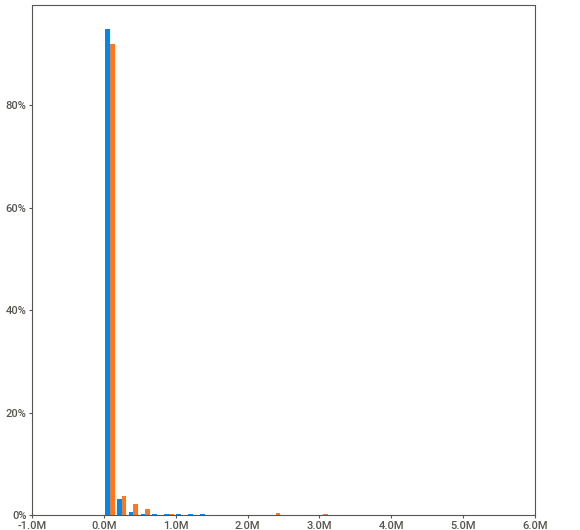
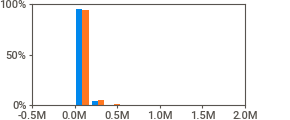
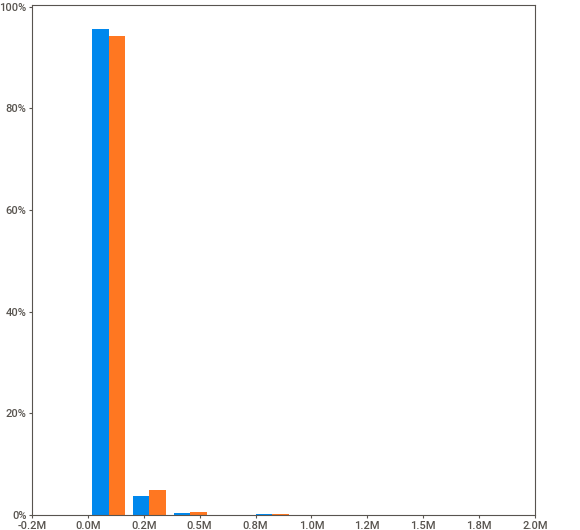
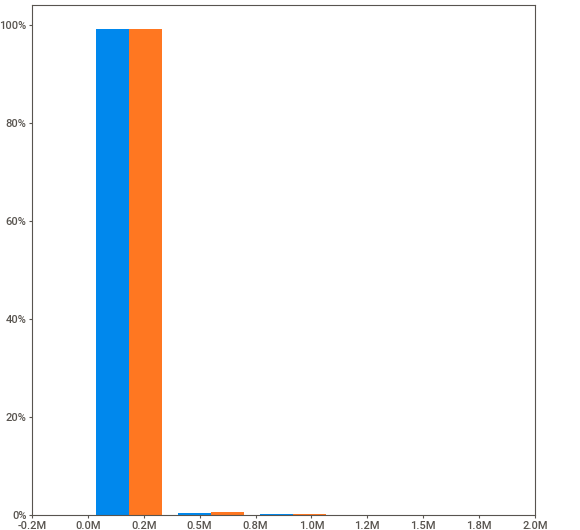
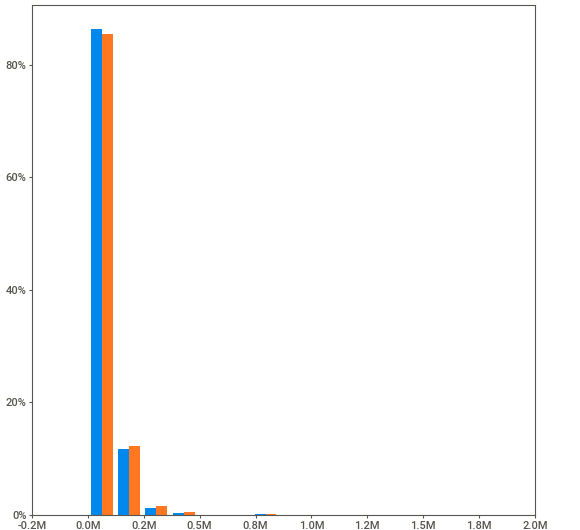
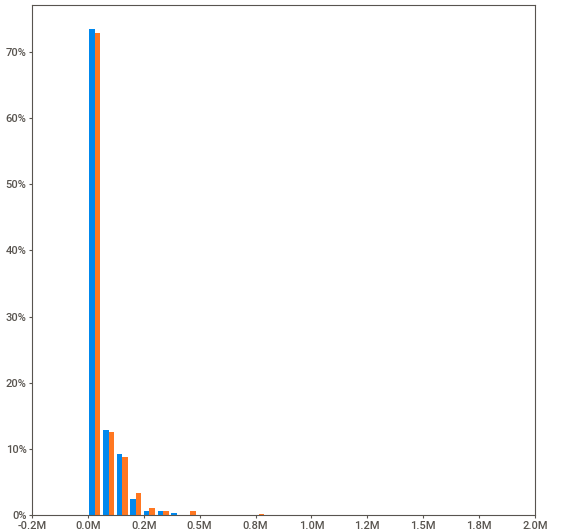
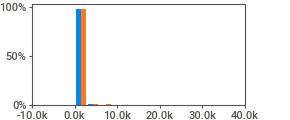
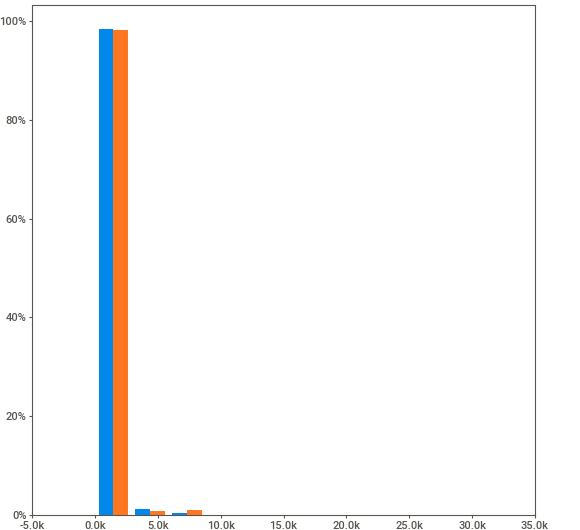
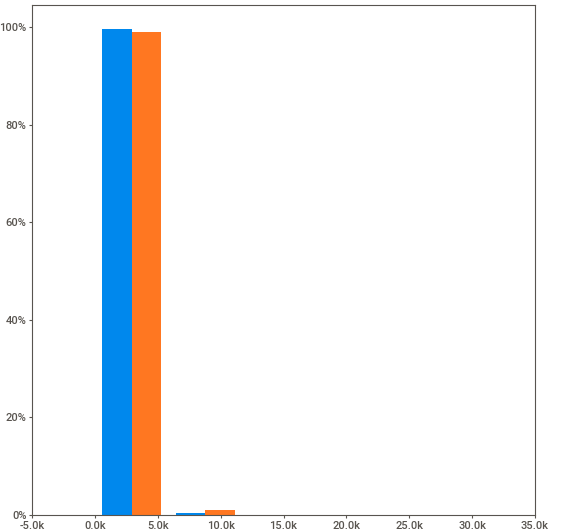
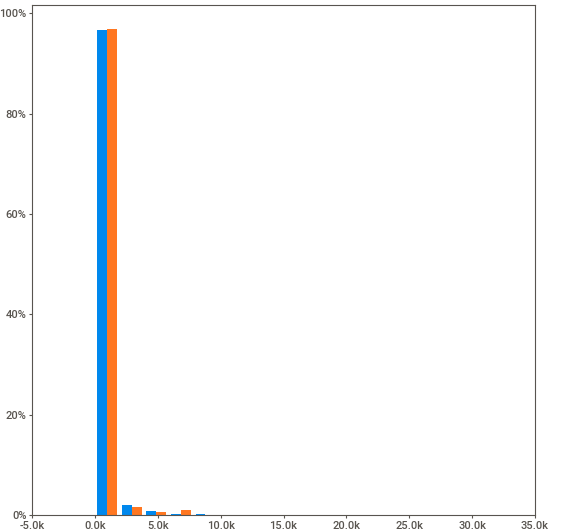
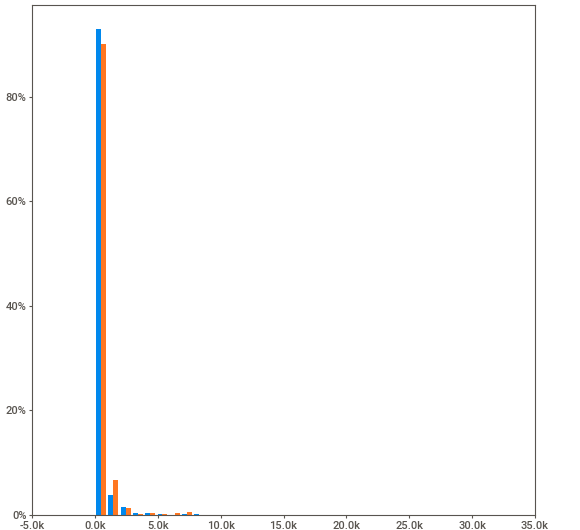
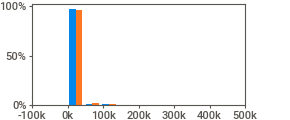
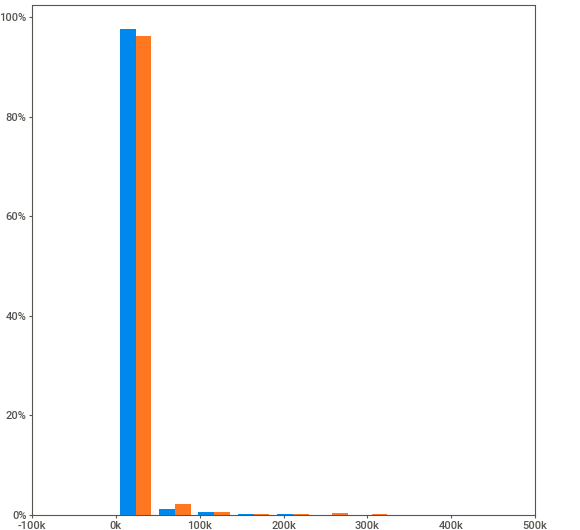
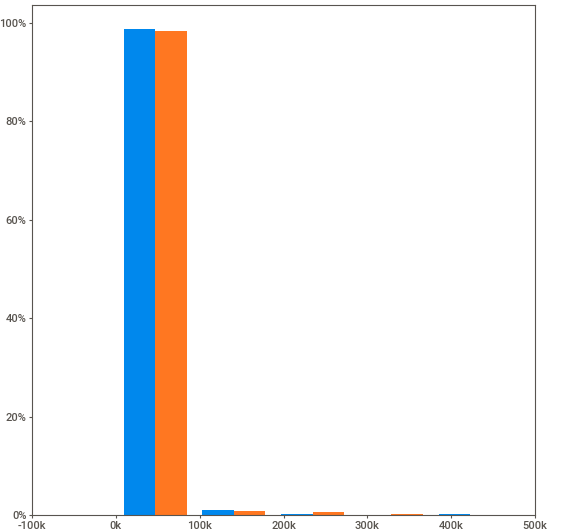
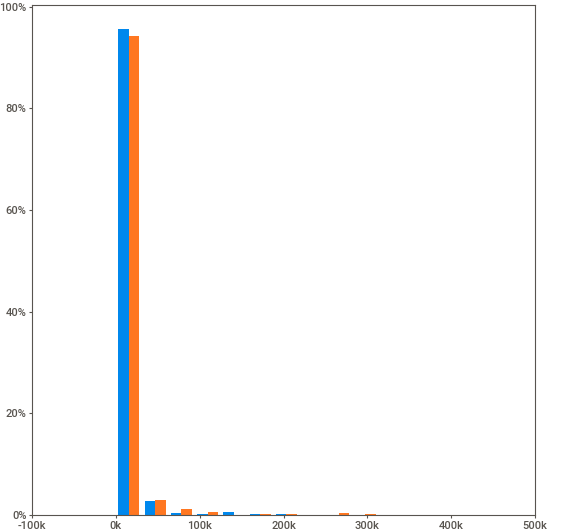
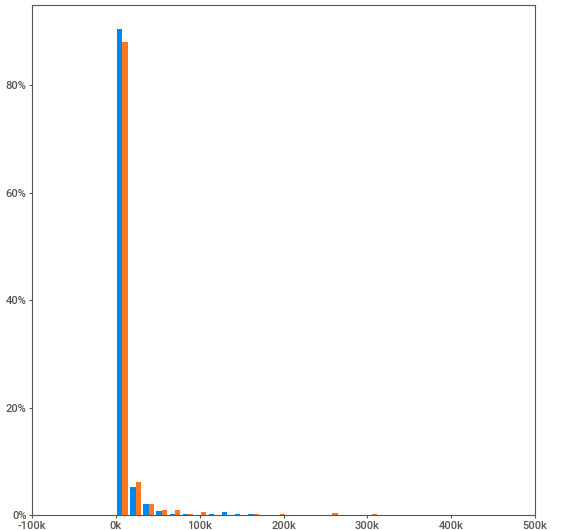
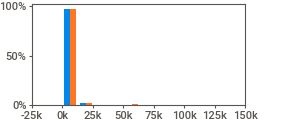
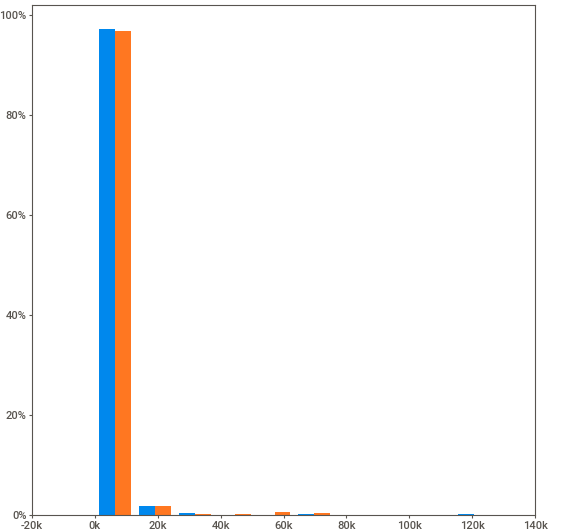
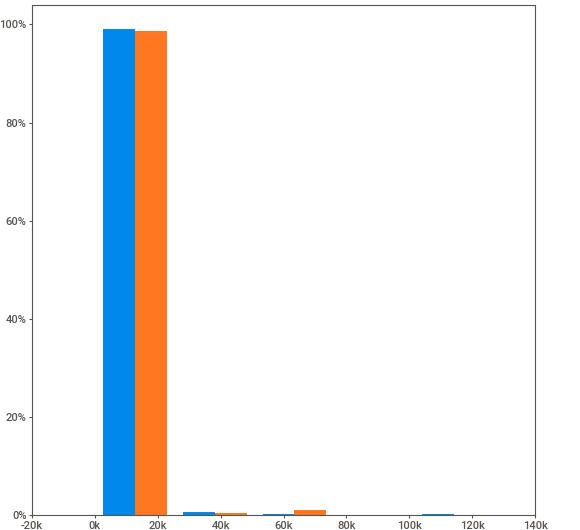
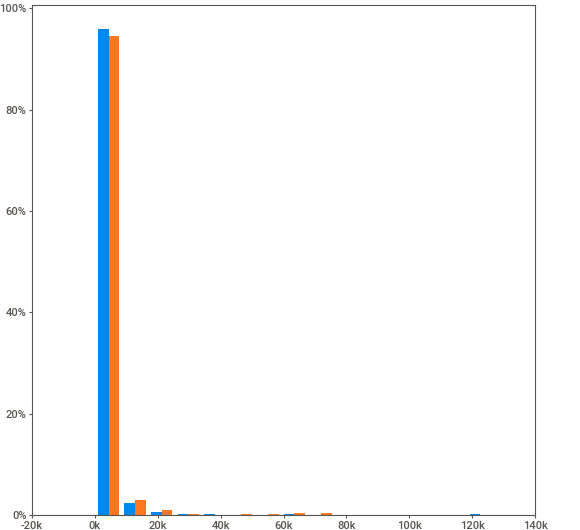
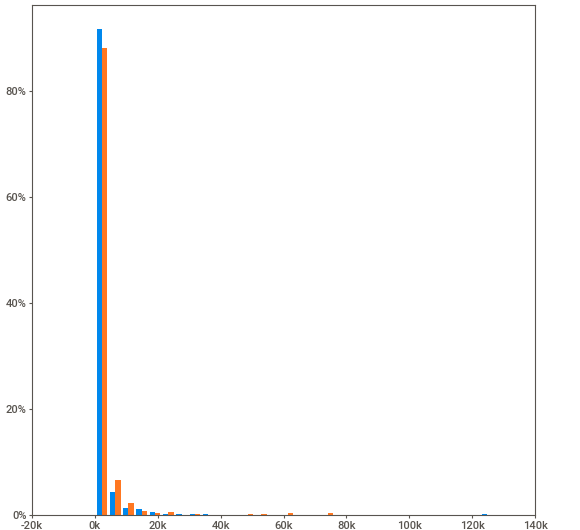
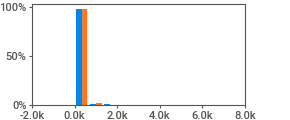
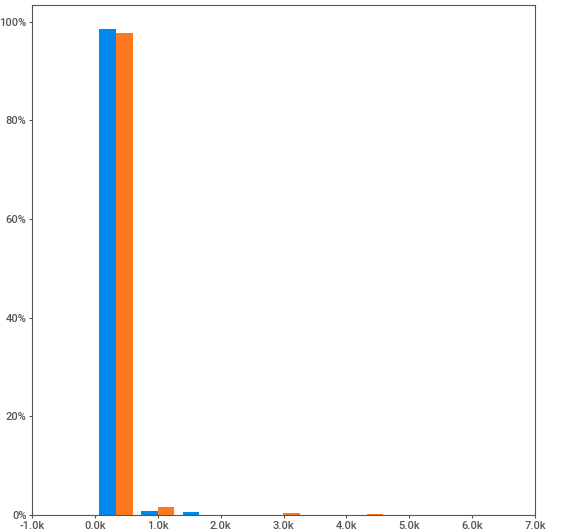
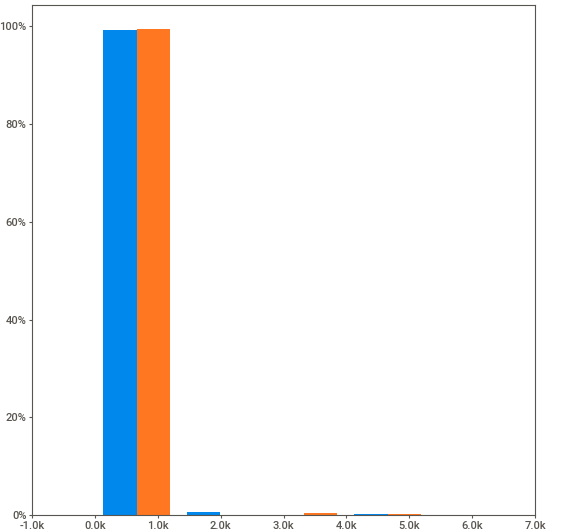
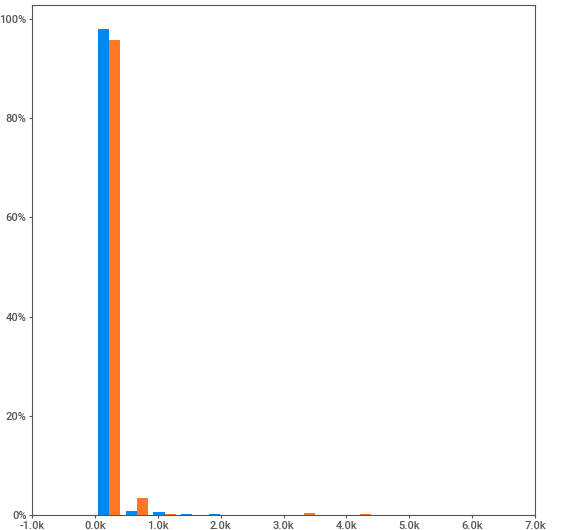
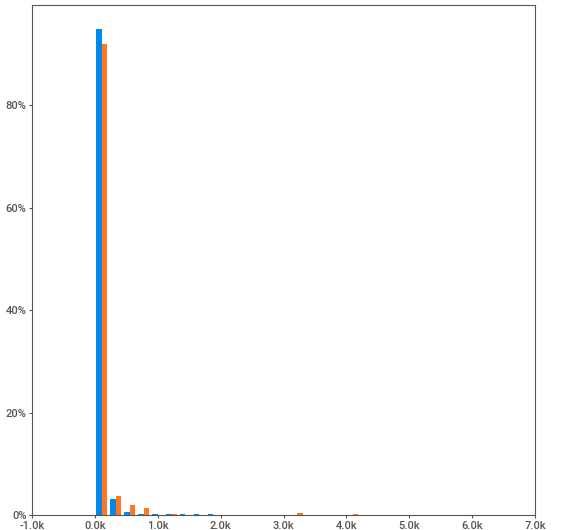
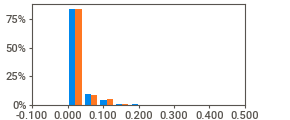
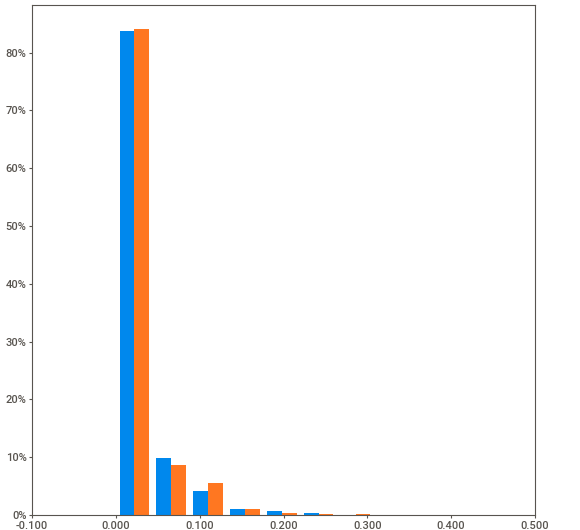
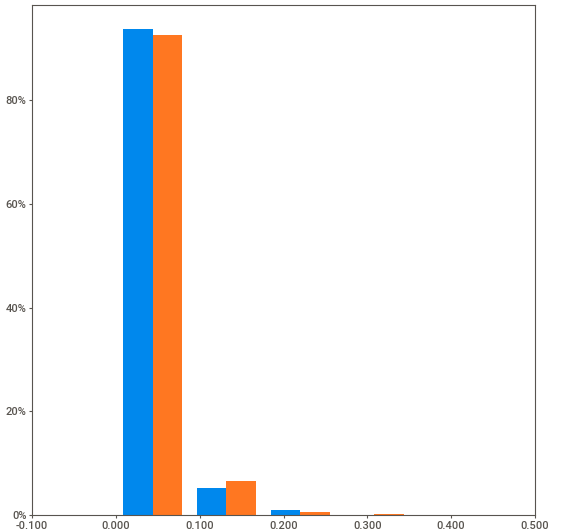
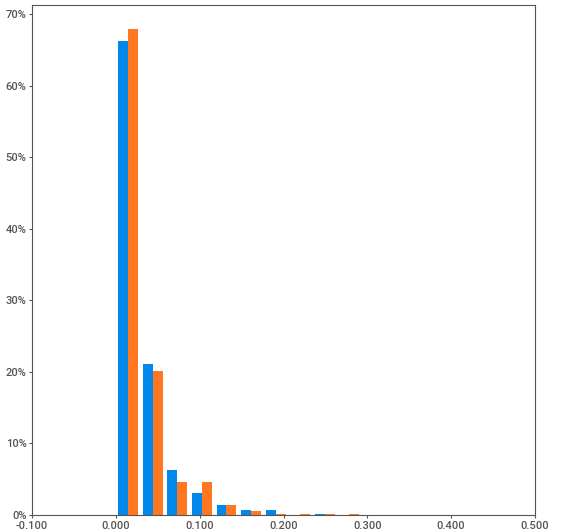
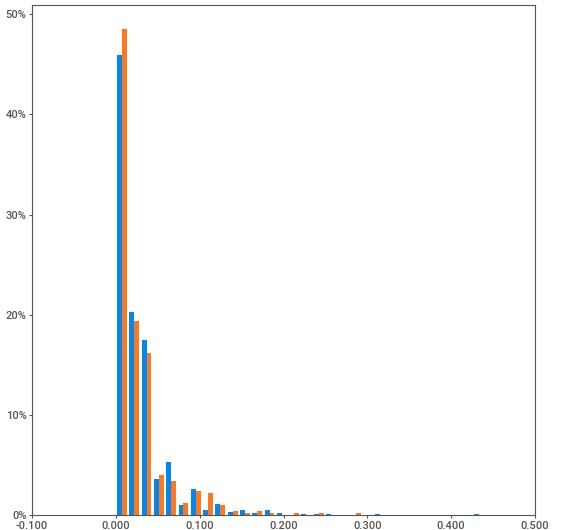
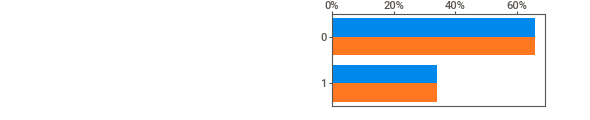
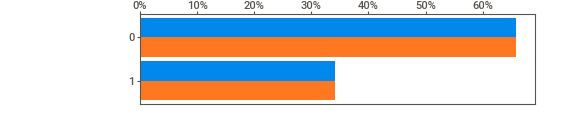
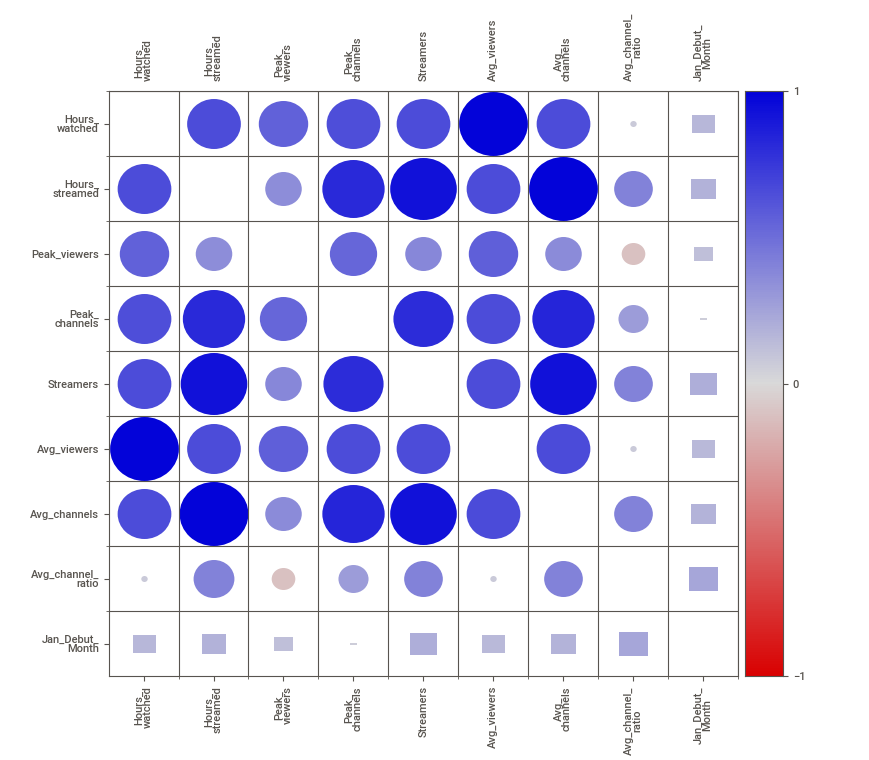
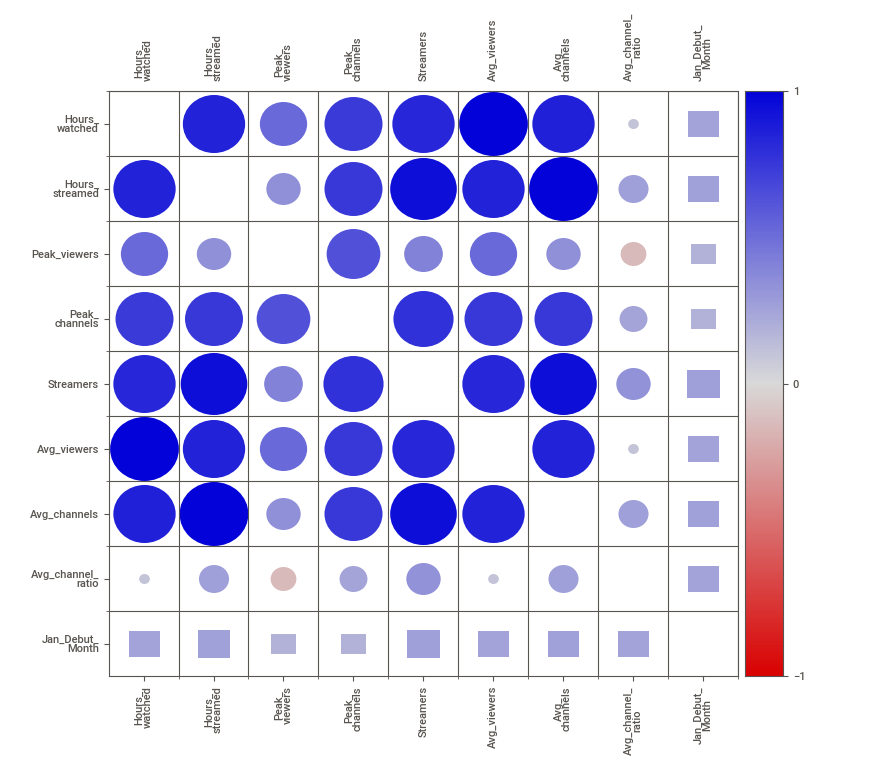

In [17]:
c_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [18]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.104183,-0.114826,-0.127525,0.018430,-0.076539,-0.100087,-0.110901,-0.195242,-0.720577
1,-0.264915,-0.207033,-0.153653,-0.278338,-0.234524,-0.264257,-0.204991,-0.195242,-0.720577
2,-0.236449,-0.058641,-0.593625,-0.190841,-0.110451,-0.237468,-0.060495,2.065569,1.387777
3,-0.271640,-0.212662,-0.519034,-0.282849,-0.264694,-0.268653,-0.211711,-0.195242,-0.720577
4,-0.245541,-0.214101,-0.095324,-0.261200,-0.260094,-0.246398,-0.215072,-0.477843,-0.720577


In [19]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.7964071856287425
score on train: 0.7321785476349101


In [21]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)

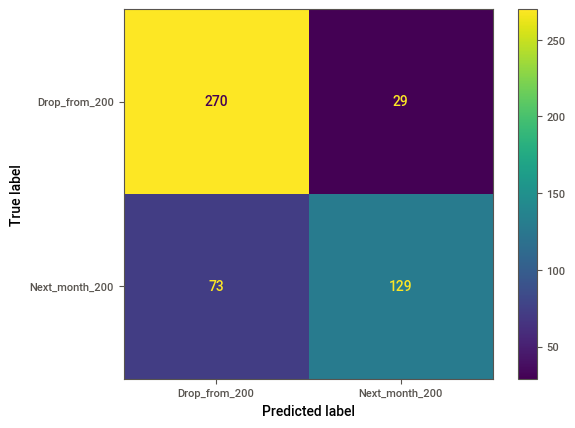

In [22]:
cm = confusion_matrix(y_test, y_pred_test_lr, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [23]:
'''Prediction based only on hours watched is not as good as logistic regression or Random Forest Classifier'''

'Prediction based only on hours watched is not as good as logistic regression or Random Forest Classifier'

In [24]:
print(classification_report(baseline_df['Next_mth_200'], baseline_df['prediction']))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1193
           1       0.61      0.61      0.61       809

    accuracy                           0.68      2002
   macro avg       0.67      0.67      0.67      2002
weighted avg       0.68      0.68      0.68      2002



In [25]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       299
           1       0.82      0.64      0.72       202

    accuracy                           0.80       501
   macro avg       0.80      0.77      0.78       501
weighted avg       0.80      0.80      0.79       501



In [26]:
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)

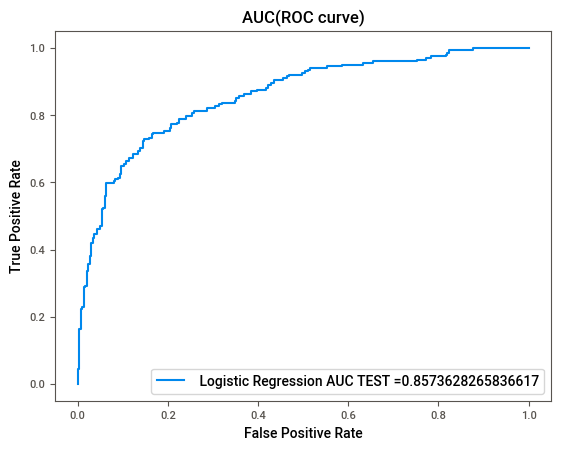

In [27]:
plt.plot(fpr_lr, tpr_lr, label=" Logistic Regression AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [28]:
y_pred_thresh = (lr.predict_proba(X_test_scaled)[:, 1] > .4).astype('float')

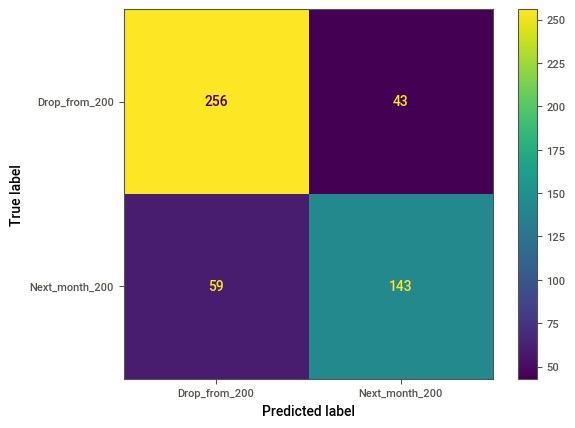

In [29]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [30]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       299
           1       0.77      0.71      0.74       202

    accuracy                           0.80       501
   macro avg       0.79      0.78      0.79       501
weighted avg       0.80      0.80      0.79       501



In [31]:
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1701)

In [32]:
print("score on test: " + str(rf.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf.score(X_train_scaled, y_train)))

score on test: 0.7684630738522954
score on train: 1.0


In [33]:
random_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100],
 'random_state': [1701]}

In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [35]:
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [36]:
print("score on test: " + str(rf_random.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_random.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8314457028647568


In [37]:
rf_random.best_params_


{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [38]:
param_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [39]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [40]:
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [41]:
print("score on test: " + str(rf_grid.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_grid.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8314457028647568


In [42]:
rf_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}

In [43]:
rf_nest_2000 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [44]:
rf_nest_2000.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=2000,
                       random_state=1701)

In [45]:
print("score on test: " + str(rf_nest_2000.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_nest_2000.score(X_train_scaled, y_train)))

score on test: 0.782435129740519
score on train: 0.8287808127914723


In [46]:
importances = rf_nest_2000.feature_importances_

In [47]:
rf_importances = pd.Series(importances, index = X_test_scaled.columns)
rf_importances = rf_importances.sort_values(ascending = False)


In [48]:
rf_importances.head(10)

Hours_streamed       0.189236
Avg_channels         0.135267
Jan_Debut_Month      0.126437
Hours_watched        0.110559
Streamers            0.109665
Avg_viewers          0.106297
Peak_channels        0.102155
Peak_viewers         0.096424
Avg_channel_ratio    0.023961
dtype: float64

In [49]:
y_pred_proba_rf = rf_nest_2000.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)

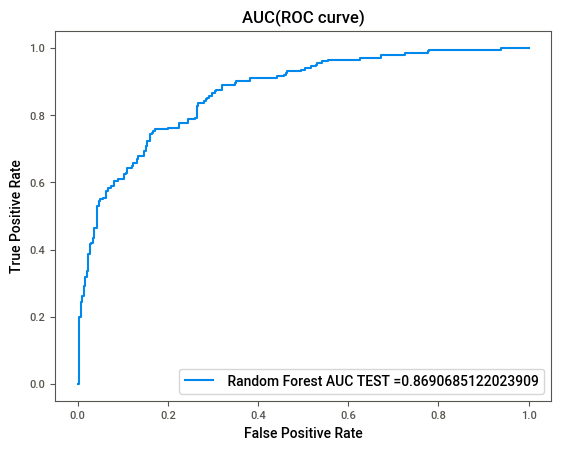

In [50]:
plt.plot(fpr_rf, tpr_rf, label=" Random Forest AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [51]:
y_pred_test_rf = rf_grid.predict(X_test_scaled)

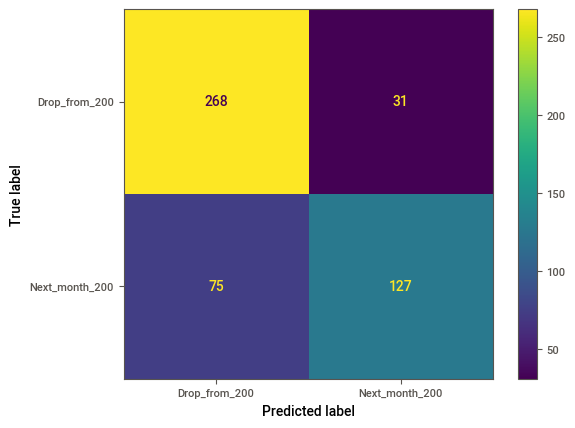

In [52]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels = rf_grid.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [53]:
y_pred_thresh = (rf_grid.predict_proba(X_test_scaled)[:, 1] > .44).astype('float')

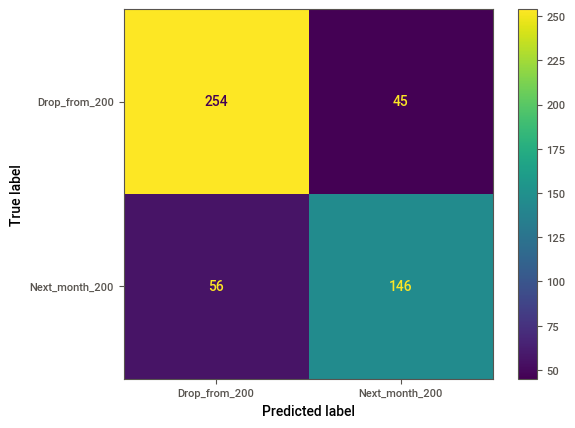

In [54]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [55]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       299
           1       0.76      0.72      0.74       202

    accuracy                           0.80       501
   macro avg       0.79      0.79      0.79       501
weighted avg       0.80      0.80      0.80       501



In [56]:
twitch_df_X_3mth = twitch_df_X[twitch_df_X['Date'] < '2022-12-12']

In [57]:
twitch_df_X_3mth.tail()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
2020,Ixion,12,2022,1035038,9529,47595,142,1251,1391.0,13.0,0.01,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2021,Marvel's Midnight Suns,12,2022,1986127,54569,27336,290,5128,2670.0,73.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2022,Project: Playtime,12,2022,699293,23731,141061,264,12707,940.0,32.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2023,Stalcraft,12,2022,1461144,29178,11735,113,3980,1964.0,39.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2024,The Callisto Protocol,12,2022,8703710,215971,267668,2598,37504,11699.0,290.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0


In [58]:
twitch_df_X_3mth.count()

Game                  1922
Month                 1922
Year                  1922
Hours_watched         1922
Hours_streamed        1922
Peak_viewers          1922
Peak_channels         1922
Streamers             1922
Avg_viewers           1922
Avg_channels          1922
Avg_channel_ratio     1922
Date                  1922
one_month_future      1922
three_month_future    1922
six_month_future      1922
Hours_watched_1mth    1922
Hours_watched_3mth    1922
Hours_watched_6mth    1922
Jan_Debut_Month       1922
Next_mth_200          1922
dtype: int64

In [59]:
twitch_df_X_3mth.reset_index(drop = True, inplace = True)

In [60]:
twitch_df_X.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
2,Age of Empires,1,2016,248884,232,107455,18,40,335.0,0.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,0,0,0,1,0
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1


In [61]:
x = len(twitch_df_X_3mth)
top200_list_3mth = []
for i in range(x):
    if twitch_df_X_3mth['Hours_watched_3mth'][i] != 0:
        top200_list_3mth.append(1)
    else:
        top200_list_3mth.append(0)

In [62]:
twitch_df_X_3mth['three_mth_200'] = top200_list_3mth

In [63]:
base_3mth = twitch_df_X_3mth.sort_values(by = 'Hours_watched_1mth', ascending = False)

In [64]:
base_pred_3mth = [1]*408 + [0]*(1922-408)

In [65]:
base_3mth['prediction'] = base_pred_3mth

In [66]:
base_3mth.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,three_mth_200,prediction
609,Lost Ark,1,2022,13020879,217772,68925,900,10145,17501.0,293.0,...,2022-02-01,2022-04-01,2022-07-01,145982931,25369445,17390017,1,1,1,1
76,League of Legends,1,2016,94377226,1362044,530270,2903,129172,126851.0,1831.0,...,2016-02-01,2016-04-01,2016-07-01,93154772,88389049,77871713,1,1,1,1


In [67]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth','Hours_watched_6mth', 'Next_mth_200', 
                                                                             'three_mth_200']), 
                                                    twitch_df_X_3mth.three_mth_200, test_size=0.25, stratify = twitch_df_X_3mth.three_mth_200,
                                                    random_state=1701)

In [68]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [69]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [70]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 0.9043659043659044
score on train: 0.9243580846634282


In [71]:
rf_random.best_params_

{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [72]:
rf_3mth = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [73]:
rf_3mth.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=2000,
                       random_state=1701)

In [74]:
'Baseline data for comparison in cell below'

'Baseline data for comparison in cell below'

In [75]:
print(classification_report(base_3mth['three_mth_200'], base_3mth['prediction']))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1514
           1       0.55      0.55      0.55       408

    accuracy                           0.81      1922
   macro avg       0.71      0.71      0.71      1922
weighted avg       0.81      0.81      0.81      1922



In [76]:
y_pred_test_3mth = rf_3mth.predict(X_test)

In [77]:
'Random Forest Model 3 month, assuming knowledge of hours watched 1 monht after debut'

'Random Forest Model 3 month, assuming knowledge of hours watched 1 monht after debut'

In [78]:
print(classification_report(y_test, y_pred_test_3mth))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       379
           1       0.84      0.71      0.77       102

    accuracy                           0.91       481
   macro avg       0.88      0.83      0.85       481
weighted avg       0.91      0.91      0.91       481



In [79]:
importances = rf_3mth.feature_importances_

In [80]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [81]:
rf_importances

Hours_watched_1mth    0.331403
Jan_Debut_Month       0.249775
Hours_streamed        0.085384
Avg_channels          0.065954
Peak_viewers          0.062704
Streamers             0.052682
Peak_channels         0.048858
Hours_watched         0.044208
Avg_viewers           0.039029
Avg_channel_ratio     0.020004
dtype: float64

In [82]:
twitch_df_X_6mth = twitch_df_X[twitch_df_X['Date'] < '2022-09-01']

In [83]:
twitch_df_X_6mth.reset_index(drop = True, inplace = True)

In [84]:
x = len(twitch_df_X_6mth)
top200_list_6mth = []
for i in range(x):
    if twitch_df_X_6mth['Hours_watched_3mth'][i] != 0:
        top200_list_6mth.append(1)
    else:
        top200_list_6mth.append(0)

In [85]:
twitch_df_X_6mth['six_mth_200'] = top200_list_6mth

In [86]:
base_6mth = twitch_df_X_6mth.sort_values('Hours_watched_3mth', ascending = False)

In [87]:
sum(top200_list_6mth)

407

In [88]:
len(top200_list_6mth)

1865

In [89]:
base_pred_6mth = [1]*407 + [0]*(1865-407)

In [90]:
base_6mth['prediction'] = base_pred_6mth

In [91]:
'''Both baseline and model make perfect predictions at 6 months from debut, assuming knowledge of hours 
watched 3 months from debut'''

'Both baseline and model make perfect predictions at 6 months from debut, assuming knowledge of hours \nwatched 3 months from debut'

In [92]:
print(classification_report(base_6mth['six_mth_200'], base_6mth['prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00       407

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



In [93]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 
                                                                             'six_mth_200']), 
                                                    twitch_df_X_6mth.six_mth_200, test_size=0.25, stratify = twitch_df_X_6mth.six_mth_200,
                                                    random_state=1701)

In [94]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [95]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [96]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


In [97]:
'''Data sets starts at Jan 2016, therefore I wanted to test any oddities of games debuting in Jan 2016. 
I removed the data from January of 2016 and ran a model to test accuracy. Some decrease in accuracy is expected
due to loss of data. But signficant difference would be worrying'''

'Data sets starts at Jan 2016, therefore I wanted to test any oddities of games debuting in Jan 2016. \nI removed the data from January of 2016 and ran a model to test accuracy. Some decrease in accuracy is expected\ndue to loss of data. But signficant difference would be worrying'

In [98]:
no_Jan2016 = twitch_df_X[twitch_df_X['Date'] != '2016-01-01']
no_Jan2016.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
200,ARK: Survival Evolved,1,2017,2167646,192501,18756,483,24488,2914.0,259.0,0.09,2017-01-01,2017-02-01,2017-04-01,2017-07-01,1830475,1070666,1259946,1,1
201,ASTRONEER,1,2017,761112,21225,29721,72,4782,1023.0,29.0,0.03,2017-01-01,2017-02-01,2017-04-01,2017-07-01,0,0,0,1,0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(no_Jan2016.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    no_Jan2016.Next_mth_200, test_size=0.25, stratify = no_Jan2016.Next_mth_200,
                                                    random_state=1701)

In [100]:
rf_noJan2016 = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [101]:
rf_noJan2016.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [102]:
rf_noJan2016.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 100}

In [103]:
rf_noJan2016 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 10, n_estimators = 100, random_state = 1701)

In [104]:
rf_noJan2016.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1701)

In [105]:
'''The accuracy score below is enough to determine that there is no great oddities in the data resulting from using Jan 2016
as a debut month, despite this likely being not a true debut month for many of the games on this list'''

'The accuracy score below is enough to determine that there is no great oddities in the data resulting from using Jan 2016\nas a debut month, despite this likely being not a true debut month for many of the games on this list'

In [106]:
print("score on test: " + str(rf_noJan2016.score(X_test, y_test)))
print("score on train: "+ str(rf_noJan2016.score(X_train, y_train)))

score on test: 0.753880266075388
score on train: 0.8016284233900814


In [107]:
'''I do not have data from this dataset before they entered the top 200. However, I can attempt to predict the hours watched 
from the debut month to the next. I have already attempted to predict the zeroes. So this will attempt the hours watched for
games that were in the top 200 2 months in a row.'''

'I do not have data from this dataset before they entered the top 200. However, I can attempt to predict the hours watched \nfrom the debut month to the next. I have already attempted to predict the zeroes. So this will attempt the hours watched for\ngames that were in the top 200 2 months in a row.'

In [108]:
noz_df = twitch_df_X[twitch_df_X['Hours_watched_1mth'] != 0]

In [109]:
noz_df.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1


In [110]:
base_noz = noz_df

In [111]:
base_noz['1mth_diff'] = base_noz['Hours_watched_1mth'] - base_noz['Hours_watched']

In [112]:
base_noz['1mth_diff'].median()

-154576.0

In [113]:
base_noz['prediction'] = base_noz['Hours_watched'] + base_noz['1mth_diff'].median()

In [114]:
x = noz_df.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Hours_watched_1mth', 'Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df.Hours_watched_1mth, test_size=0.25, random_state=1701)

In [115]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.256115,-0.319352,-0.272180,-0.330493,-0.403284,-0.256848,-0.314875,-0.696471,-1.013290
1,-0.274355,-0.294672,0.224038,-0.317483,-0.339148,-0.270921,-0.290400,-0.696471,-1.013290
2,-0.297519,-0.115383,-0.270431,0.295264,-0.201626,-0.297627,-0.116351,1.572676,-1.013290
3,-0.121909,-0.240355,0.615694,-0.237475,-0.194777,-0.124755,-0.238729,-0.696471,0.986885
4,-0.286662,-0.053396,-0.602511,-0.247882,-0.144923,-0.286944,-0.056522,1.856319,0.986885


In [116]:
mlr = LinearRegression()

In [117]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [118]:
y_pred_mlr= mlr.predict(X_test_scaled)

In [119]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1034,3650194,1.284599e+06
588,660872,1.815768e+06
177,374856,1.011052e+06
303,166134,9.005599e+05
77,222387,-3.530944e+05


In [120]:
mlr_diff[mlr_diff['Actual value'] == 166134]

,Actual value,Predicted value
303,166134,900559.924247


In [121]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,noz_df.Hours_watched_1mth)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -3023368464299.60
Mean Absolute Error: 1739549.4728041925
Mean Square Error: 13220153993562.62
Root Mean Square Error: 3635952.969107634


In [122]:
rfr = RandomForestRegressor(random_state=1701)

In [123]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [124]:
meanAbErr = metrics.mean_absolute_error(base_noz['Hours_watched_1mth'], base_noz['prediction'])
meanSqErr = metrics.mean_squared_error(base_noz['Hours_watched_1mth'], base_noz['prediction'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz['Hours_watched_1mth'], base_noz['prediction']))
r2 = r2_score(base_noz['Hours_watched_1mth'], base_noz['prediction'])
mape = mean_absolute_percentage_error(base_noz['Hours_watched_1mth'], base_noz['prediction'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.37027697052803776
Mean Absolute Error: 1688917.0914709517
Mean Square Error: 43763070775200.21
Root Mean Square Error: 6615366.261606398
Mean Absolute Percentage Error: 1.1493906419960174


In [125]:
meanAbErr = metrics.mean_absolute_error(base_noz['Hours_watched_1mth'], base_noz['Hours_watched'])
meanSqErr = metrics.mean_squared_error(base_noz['Hours_watched_1mth'], base_noz['Hours_watched'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz['Hours_watched_1mth'], base_noz['Hours_watched']))
r2 = r2_score(base_noz['Hours_watched_1mth'], base_noz['Hours_watched'])
mape = mean_absolute_percentage_error(base_noz['Hours_watched_1mth'], base_noz['Hours_watched'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.3677506871227991
Mean Absolute Error: 1715592.5624227442
Mean Square Error: 43938636721318.42
Root Mean Square Error: 6628622.535739867
Mean Absolute Percentage Error: 1.2059516193213438


In [126]:
y_pred_rfr= rfr.predict(X_test)

In [127]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rfr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rfr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))
r2 = r2_score(y_test, y_pred_rfr)
mape = mean_absolute_percentage_error(y_test, y_pred_rfr)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.5703755626753286
Mean Absolute Error: 1705261.5656157632
Mean Square Error: 40991724497429.59
Root Mean Square Error: 6402477.996637676
Mean Absolute Percentage Error: 1.0507723783818461


In [128]:
random_grid = {'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [129]:
rfr = RandomForestRegressor(random_state = 1701)
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=1701)

In [130]:
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100]},
                   random_state=1701)

In [131]:
rfr_random.best_params_

{'n_estimators': 100, 'min_samples_leaf': 50, 'max_depth': 5}

In [132]:
'Both Random Search and Grid Search are worse than the base model by a lot'

'Both Random Search and Grid Search are worse than the base model by a lot'

In [133]:
y_pred_rfr_rand = rfr_random.predict(X_test)

In [134]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rfr_rand)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rfr_rand)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr_rand))
r2 = r2_score(y_test, y_pred_rfr_rand)
mape = mean_absolute_percentage_error(y_test, y_pred_rfr_rand)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.23314171444331955
Mean Absolute Error: 2653188.873840058
Mean Square Error: 73168192586668.47
Root Mean Square Error: 8553840.809055805
Mean Absolute Percentage Error: 1.382616976585178


In [135]:
rfr = RandomForestRegressor(random_state = 1701)
rfr_grid = GridSearchCV(estimator = rfr, param_grid = random_grid, cv = 3)

In [136]:
rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [137]:
rfr_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'n_estimators': 100}

In [138]:
rfr_best = RandomForestRegressor(max_depth = 5, min_samples_leaf = 50, n_estimators = 2000, random_state = 1701)

In [139]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=2000,
                      random_state=1701)

In [140]:
y_pred = rfr_best.predict(X_test)

In [141]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.23012074742000344
Mean Absolute Error: 2638048.6302234423
Mean Square Error: 73456431888666.11
Root Mean Square Error: 8570672.779231869
Mean Absolute Percentage Error: 1.3689547937881816


In [142]:
noz_df_3mth = noz_df[noz_df['Hours_watched_3mth'] != 0] 

In [143]:
noz_df_3mth.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,1mth_diff,prediction
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,...,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1,-130316,115105.0
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,...,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1,-1471,101041.0


In [144]:
x = noz_df_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df_3mth.Hours_watched_3mth, test_size=0.25, random_state=1701)

In [145]:
rfr_3mth = RandomForestRegressor(random_state=1701)

In [146]:
rfr_3mth.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [147]:
y_pred_3mth = rfr_3mth.predict(X_test)

In [148]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_3mth)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_3mth)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_3mth))
r2 = r2_score(y_test, y_pred_3mth)
mape = mean_absolute_percentage_error(y_test, y_pred_3mth)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.7135702955279529
Mean Absolute Error: 1889323.789361702
Mean Square Error: 37345639982178.02
Root Mean Square Error: 6111107.917732923
Mean Absolute Percentage Error: 1.0682930769804502


In [149]:
rfr_3mth = RandomForestRegressor(random_state = 1701)
rfr_grid_3mth = GridSearchCV(estimator = rfr_3mth, param_grid = random_grid, cv = 3)

In [150]:
rfr_grid_3mth.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [151]:
rfr_grid_3mth.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 100}

In [152]:
rfr_3mth_best = RandomForestRegressor(max_depth = None, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [153]:
rfr_3mth_best.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=2000, random_state=1701)

In [154]:
y_pred_3mth = rfr_3mth_best.predict(X_test)

In [155]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_3mth)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_3mth)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_3mth))
r2 = r2_score(y_test, y_pred_3mth)
mape = mean_absolute_percentage_error(y_test, y_pred_3mth)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.8531265620397721
Mean Absolute Error: 1604665.1009233268
Mean Square Error: 19149838342072.953
Root Mean Square Error: 4376052.826700444
Mean Absolute Percentage Error: 1.202212474047224


In [156]:
base_noz_3mth = noz_df_3mth

In [157]:
base_noz_3mth['3mth_diff'] = base_noz['Hours_watched_3mth'] - base_noz['Hours_watched_1mth']

In [158]:
base_noz_3mth['3mth_diff'].median()

-41334.0

In [159]:
base_noz_3mth['prediction'] = base_noz_3mth['Hours_watched'] + base_noz_3mth['1mth_diff'].median()

In [160]:
meanAbErr = metrics.mean_absolute_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction'])
meanSqErr = metrics.mean_squared_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction']))
r2 = r2_score(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction'])
mape = mean_absolute_percentage_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.5578602703505053
Mean Absolute Error: 2348520.4718498657
Mean Square Error: 65311764264878.28
Root Mean Square Error: 8081569.41842847
Mean Absolute Percentage Error: 1.4938274267888494


In [161]:
meanAbErr = metrics.mean_absolute_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth'])
meanSqErr = metrics.mean_squared_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth']))
r2 = r2_score(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth'])
mape = mean_absolute_percentage_error(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.4998744001790798
Mean Absolute Error: 1981199.4798927614
Mean Square Error: 73877290566557.25
Root Mean Square Error: 8595189.966868518
Mean Absolute Percentage Error: 1.2249099401553


In [162]:
noz_df_6mth = noz_df_3mth[noz_df_3mth['Hours_watched_6mth'] != 0]

In [163]:
x = noz_df_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_6mth','Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df_6mth.Hours_watched_6mth, test_size=0.25, random_state=1701)

In [164]:
rfr_6mth = RandomForestRegressor(random_state = 1701)

In [165]:
rfr_6mth.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [166]:
y_pred_6mth = rfr_6mth.predict(X_test)

In [167]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_6mth)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_6mth)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_6mth))
r2 = r2_score(y_test, y_pred_6mth)
mape = mean_absolute_percentage_error(y_test, y_pred_6mth)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.5772557124359676
Mean Absolute Error: 3231574.599848485
Mean Square Error: 82453434480670.25
Root Mean Square Error: 9080387.353008144
Mean Absolute Percentage Error: 0.648817838299254


In [168]:
base_noz_6mth = noz_df_6mth

In [169]:
base_noz_6mth['6mth_diff'] = base_noz['Hours_watched_6mth'] - base_noz['Hours_watched_3mth']

In [170]:
base_noz_6mth['prediction'] = base_noz_6mth['Hours_watched'] + base_noz_3mth['1mth_diff'].median()

In [175]:
meanAbErr = metrics.mean_absolute_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction'])
meanSqErr = metrics.mean_squared_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction']))
r2 = r2_score(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction'])
mape = mean_absolute_percentage_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.477595472076515
Mean Absolute Error: 3283737.0344827585
Mean Square Error: 111711147978406.83
Root Mean Square Error: 10569349.458618863
Mean Absolute Percentage Error: 1.2198957765530005


In [174]:
meanAbErr = metrics.mean_absolute_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth'])
meanSqErr = metrics.mean_squared_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth'])
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth']))
r2 = r2_score(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth'])
mape = mean_absolute_percentage_error(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth'])
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.9034256925732245
Mean Absolute Error: 1676340.5057471264
Mean Square Error: 20651480167577.76
Root Mean Square Error: 4544389.966494706
Mean Absolute Percentage Error: 0.5519367396774476


In [176]:
rfr_6mth = RandomForestRegressor(random_state = 1701)
rfr_grid_6mth = GridSearchCV(estimator = rfr_6mth, param_grid = random_grid, cv = 3)

In [177]:
rfr_grid_6mth.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [179]:
rfr_grid_6mth.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}

In [180]:
rfr_6mth_best = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [181]:
rfr_6mth_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=2000,
                      random_state=1701)

In [183]:
y_pred_6mth = rfr_6mth_best.predict(X_test)

In [184]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_6mth)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_6mth)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_6mth))
r2 = r2_score(y_test, y_pred_6mth)
mape = mean_absolute_percentage_error(y_test, y_pred_6mth)
print('R squared:', r2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', mape)

R squared: 0.26855223834199504
Mean Absolute Error: 3751720.120375608
Mean Square Error: 142663974099865.53
Root Mean Square Error: 11944202.53092962
Mean Absolute Percentage Error: 0.6875374393358996
